#####   1. Getting and preprocessing input data

If you have previously executed this step and downloaded all input data you can skip this step and proceed directly to step 2. However, if you are not sure, run step 1 and the model will either confirm that a specific data has aready been downloaded and subsequently viualize it or it will proceeed to download the data if it is not available or prior download was incomplete.

In [1]:
# Set working directory and path to shapefile of study area. This is repeated in every step to make each step independent

working_dir = 'volta'  #provide full working directory
study_area = 'bakaano/test/volta.shp'  #provide full path to shapefile of study_area
start_date = '1981-01-01'  # provide start date in format e.g. 'YYYY-MM-DD'.
end_date = '2016-12-31'  #provide end date in format e.g. 'YYYY-MM-DD'

# Note that the start and end dates should cover model training and validation periods. Specific training and validation start and end
# should be provided in step 3 and 4.

     - Tree cover data already exists in volta/vcf/mean_tree_cover.tif; skipping download.
     - Tree cover data already exists in volta/vcf/mean_tree_cover.tif; skipping preprocessing.


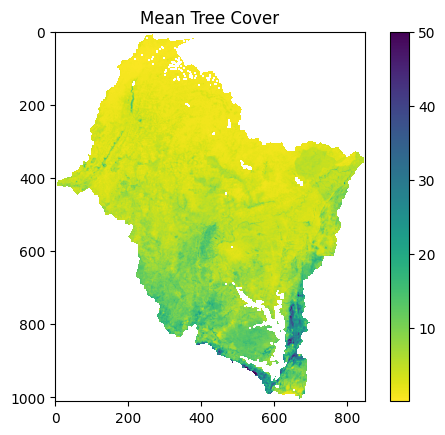

In [2]:

# download and preprocess MODIS vegetation continuous fields from Google Earth Engine Data catalog

from bakaano.tree_cover import TreeCover
vf = TreeCover(working_dir, study_area)
vf.download_tree_cover()
vf.preprocess_tree_cover()
vf.plot_tree_cover(variable='tree_cover') # options for plot are 'tree_cover' and 'herb_cover'

     - NDVI data already exists in volta/ndvi/daily_ndvi_climatology.pkl; skipping download.
     - NDVI data already exists in volta/ndvi/daily_ndvi_climatology.pkl; skipping preprocessing.


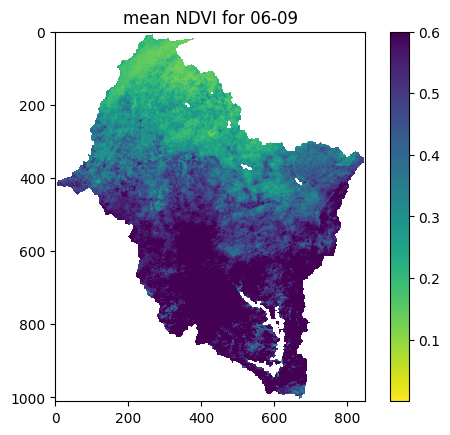

In [3]:
# download and preprocess MODIS NDVI data from Google Earth Engine Data catalog

from bakaano.ndvi import NDVI
nd = NDVI(working_dir, study_area)
nd.download_ndvi()
nd.preprocess_ndvi()
nd.plot_ndvi(interval_num=10)  # because NDVI is in 16-day interval the 'interval_num' represents a 16-day period. 
                               #Hence 0 is the first 16 day period

     - DEM data already exists in volta/elevation; skipping download.


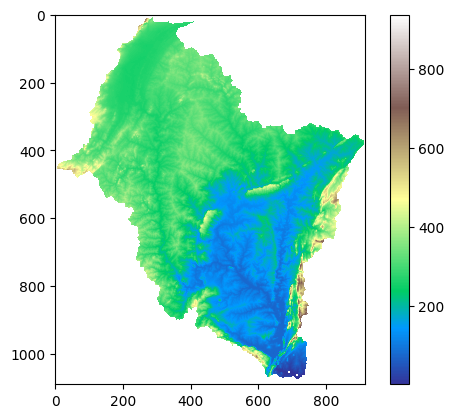

In [4]:
# Get elevation data

from bakaano.dem import DEM
dd = DEM(working_dir, study_area, local_data=False, local_data_path=None)
dd.get_dem_data()
dd.plot_dem()

     - Soil data already exists in volta/soil; skipping download.


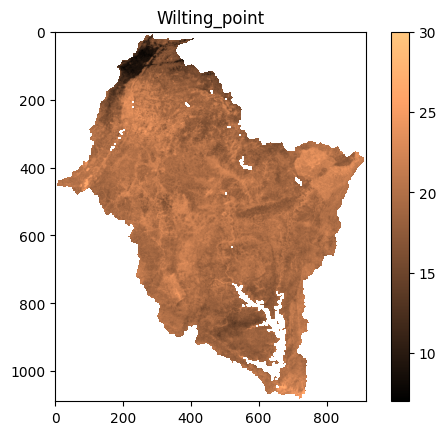

In [5]:
# Get soil data

from bakaano.soil import Soil
sgd = Soil(working_dir, study_area)
sgd.get_soil_data()
sgd.plot_soil(variable='wilting_point')

     - ERA5 Land daily data already exists in volta/era5_land; skipping download.
     - ERA5 Land daily data already exists in volta/era5_land; skipping download.


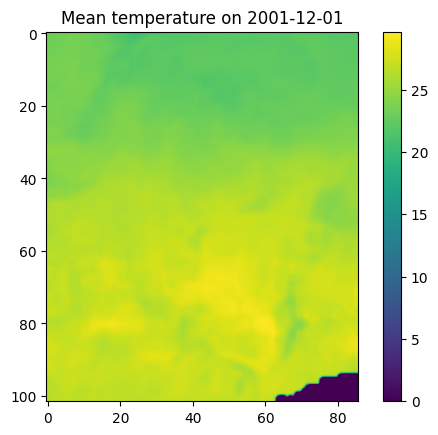

In [6]:
# Get meteo data

from bakaano.meteo import Meteo
cd = Meteo(working_dir, study_area, start_date=start_date, end_date=end_date, local_data=False, data_source='ERA5', local_prep_path=None, local_tasmax_path=None, 
           local_tasmin_path=None, local_tmean_path=None)
prep, tasmax, tasmin, tmean = cd.get_meteo_data()
cd.plot_meteo(variable='tmean', date='2001-12-01')

#####   2. Computing runoff and routing to river network

In [ ]:
# Set working directory and path to shapefile of study area. This is repeated in every step to make each step independent

working_dir = 'volta'  #provide full working directory
study_area = 'bakaano/test/volta.shp'  #provide full path to shapefile of study_area
start_date = '1981-01-01'  # provide start date in format e.g. 'YYYY-MM-DD'.
end_date = '2016-12-31'  #provide end date in format e.g. 'YYYY-MM-DD'

# Note that the start and end dates should cover model training and validation periods. Specific training and validation start and end
# should be provided in step 3 and 4.

In [ ]:
climate_data_source = 'ERA5'

from bakaano.veget import VegET
vg = VegET(working_dir, study_area, start_date, end_date, climate_data_source=climate_data_source)
vg.compute_veget_runoff_route_flow()

#####   3. Training Bakaano-Hydro model 

In [ ]:
# Set working directory and path to shapefile of study area. This is repeated in every step to make each step independent

working_dir = 'volta'  #provide full working directory
study_area = 'bakaano/test/volta.shp'  #provide full path to shapefile of study_area
start_date = '1981-01-01'  # provide start date in format e.g. 'YYYY-MM-DD'.
end_date = '2016-12-31'  #provide end date in format e.g. 'YYYY-MM-DD'

# Note that the start and end dates should cover model training and validation periods. Specific training and validation start and end
# should be provided in step 3 and 4.

In [ ]:
#TRAINING THE NEURAL NETWORK MODEL
# Initialize  instance of Bakaano-Hydro model

train_start_date = '1989-01-01'
train_end_date = '2016-12-31'
grdc_netcdf = '/lustre/backup/WUR/ESG/duku002/NBAT/hydro/input_data/GRDC-Daily-africa-south-america.nc'   #provide path to netcdf format of observed streamflow obtained from GRDC
climate_data_source = 'ERA5'

from bakaano.runner import BakaanoHydro
bk = BakaanoHydro(  
    working_dir,
    study_area,
    start_date,
    end_date,
    climate_data_source=climate_data_source
)

bk.train_streamflow_model(train_start=train_start_date, train_end=train_end_date, grdc_netcdf=grdc_netcdf,  
                          loss_fn='laplacian_nll', num_input_branch=2, lookback=365, batch_size=256, num_epochs=100)

#####   4. Evaluating Bakaano-Hydro model performance

In [ ]:
# Set working directory and path to shapefile of study area. This is repeated in every step to make each step independent

working_dir = 'volta'  #provide full working directory
study_area = 'bakaano/test/volta.shp'  #provide full path to shapefile of study_area
start_date = '1981-01-01'  # provide start date in format e.g. 'YYYY-MM-DD'.
end_date = '2016-12-31'  #provide end date in format e.g. 'YYYY-MM-DD'
climate_data_source = 'ERA5'

# Note that the start and end dates should cover model training and validation periods. Specific training and validation start and end
# should be provided in step 3 and 4.

In [ ]:
#EVALUATING THE NEURAL NETWORK MODEL
model_path = f'{working_dir}/models/bakaano_model_laplacian_nll_2_branches.keras'
grdc_netcdf = '/lustre/backup/WUR/ESG/duku002/NBAT/hydro/input_data/GRDC-Daily-africa-south-america.nc'
val_start_date = '1981-01-01'
val_end_date = '1988-12-31'

from bakaano.runner import BakaanoHydro
bk = BakaanoHydro(
    working_dir,
    study_area,
    start_date,
    end_date,
    climate_data_source=climate_data_source
)

bk.evaluate_streamflow_model_interactively(model_path=model_path, val_start=val_start_date, val_end=val_end_date, grdc_netcdf=grdc_netcdf, 
                                           loss_fn='laplacian_nll', num_input_branch=2, lookback=365)

#####   5. Simulating streamflow series with Bakaano-Hydro

In [ ]:
# Set working directory and path to shapefile of study area. This is repeated in every step to make each step independent

working_dir = 'volta'  #provide full working directory
study_area = 'bakaano/test/volta.shp'  #provide full path to shapefile of study_area
start_date = '1981-01-01'  # provide start date in format e.g. 'YYYY-MM-DD'.
end_date = '2016-12-31'  #provide end date in format e.g. 'YYYY-MM-DD'

# Note that the start and end dates should cover model training and validation periods. Specific training and validation start and end
# should be provided in step 3 and 4.

In [ ]:
model_path = f'{working_dir}/models/bakaano_model_laplacian_nll_3_branches.keras'
latlist = []
lonlist =[]
sim_start = '1981-01-01'
sim_end = '2016-12-31'

from bakaano.runner import BakaanoHydro
bk = BakaanoHydro(
    working_dir,
    study_area,
    start_date,
    end_date
)


bk.simulate_streamflow(model_path='', sim_start=sim_start, sim_end=sim_end, latlist=latlist, lonlist=lonlist, 
                       grdc_netcdf=grdc_netcdf, prep_nc=prep, tasmax_nc=tasmax, tasmin_nc=tasmin, tmean_nc=tmean,
                       loss_fn='mean_squared_logarithmic_error', num_input_branch=3, lookback=365)